 # Volatility Spillover Measures Using Generalized Variance Decomposition (GVD)



 Diebold and Yilmaz (2009, 2012) propose measuring volatility spillovers using the forecast error variance decomposition from a vector autoregressive (VAR) model.



 The VAR($p$) model is specified as:



 $$

 Y_t = \sum_{i=1}^p \Phi_i Y_{t-i} + \varepsilon_t,

 $$



 where $Y_t$ is an $N \times 1$ vector of realized variances, $\Phi_i$ are coefficient matrices, and $\varepsilon_t$ is a white noise error vector with covariance matrix $\Sigma$.



 The moving average representation is:



 $$

 Y_t = \sum_{i=0}^\infty A_i \varepsilon_{t-i}

 $$



 where matrices $A_i$ satisfy the recursion $A_i = \sum_{j=1}^p \Phi_j A_{i-j}$, with $A_0 = I_N$.



The forecast error variance decomposition quantifies the fraction of the $H$-step-ahead forecast error variance of variable $i$ attributable to shocks in variable $j$. The **Generalized Variance Decomposition (GVD)** method by Koop et al. (1996) and Pesaran and Shin (1998) is used because it is invariant to variable ordering.



 The GVD element is:



 $$

\theta^{g}_{ij}(H) = \frac{\sigma_{jj}^{-1} \sum_{h=0}^{H-1} \left( e_i' A_h \Sigma e_j \right)^2 }{

\sum_{h=0}^{H-1} \left( e_i' A_h \Sigma A_h' e_i \right) }

$$



 where $\sigma_{jj}$ is the variance of the error term for equation $j$, and $e_i$ is a selection vector with 1 in position $i$, zero elsewhere.



 Normalizing rows so their sum equals one gives:



$$

\tilde{\theta}^{g}_{ij}(H) = \frac{\theta^{g}_{ij}(H)}{\sum_{j=1}^N \theta^{g}_{ij}(H)}.

$$



 The **Total Spillover Index (TSI)** measures the contribution of spillovers to total forecast error variance:



$$

S^{g}(H) = \frac{\sum_{i=1}^N \sum_{j=1, j\neq i}^N \tilde{\theta}^{g}_{ij}(H)}{N} \times 100.

$$



Directional spillovers transmitted from market $i$ to others and received by market $i$ from others can also be computed from normalized GVD elements.

In [21]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Standard library
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import math

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Numerical / data
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import numpy as np
import pandas as pd

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Visualisation & widgets
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Optimisation utilities
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
from sklearn.linear_model import MultiTaskLasso, MultiTaskLassoCV
from joblib import Parallel, delayed
from tqdm import tqdm


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Project-specific helpers
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
from utils.mhar_utils import (
    SEED,
    LASSO_OPTS,
    FAST_LASSO_OPTS,
    create_mhar_lags,
    fit_mhar_lasso,
    gvd,
    spillover_metrics,
)


 ## Step 1: Load PIT-transformed realized variances and prepare VAR input

In [32]:
# --- Create dropdown ---
option_selector = widgets.Dropdown(
    options=['europe', 'australia'],
    value='europe',  # initial default
    description='Dataset:',
    disabled=False,
)

# --- Create button ---
button = widgets.Button(
    description="Load Dataset",
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to load selected dataset',
    icon='check'  # (optional) FontAwesome icon
)

# --- Define button click handler ---
def on_button_click(b):
    global selected_option
    clear_output(wait=True)  # Clears previous output to keep it clean
    display(option_selector, button)  # Re-display widgets after clear
    
    selected_option = option_selector.value
    
# --- Attach button click handler ---
button.on_click(on_button_click)

# --- Display UI ---
display(option_selector, button)

Dropdown(description='Dataset:', index=1, options=('europe', 'australia'), value='australia')

Button(button_style='success', description='Load Dataset', icon='check', style=ButtonStyle(), tooltip='Click t‚Ä¶

In [33]:


pit_vars = pd.read_parquet(f"parquet_files/pit_transformed_variances_{selected_option}.parquet")
pit_vars.index = pd.to_datetime(pit_vars.index)

# Inspect the data
pit_vars.head()


Area             nsw       qld        sa       tas       vic
2009-07-01 -0.699212 -1.271926 -0.097437 -0.011362 -0.901846
2009-07-02  0.282052  1.040695  0.045462 -0.024856  0.442966
2009-07-03 -0.661619 -0.563926 -0.589925 -0.683880 -0.319200
2009-07-04 -0.720222 -0.947581 -0.711049 -0.065375 -0.551482
2009-07-05 -0.212486 -0.117435 -0.153986 -0.218300  0.083889

 ## Step 2: Fit MHAR model on realized variances





In [4]:
# Fit MHAR(1,7,30) with MultiTaskLassoCV

# # --- Build MHAR regressors 
# def create_mhar_lags(df):
#     """
#     Replicates the R HAR_ReV function:
#       ‚Ä¢ lag-1 daily value
#       ‚Ä¢ 7-day moving-average (lagged one day)
#       ‚Ä¢ 30-day moving-average (lagged one day)
#     Returns a dataframe [Y | lag1 | wavg | mavg] with matching index.
#     """
#     lag1  = df.shift(1).add_suffix("_lag1")
#     wavg  = df.rolling(7 , min_periods=7).mean().shift(1).add_suffix("_wavg")
#     mavg  = df.rolling(30, min_periods=30).mean().shift(1).add_suffix("_mavg")
#     return pd.concat([df, lag1, wavg, mavg], axis=1).dropna()



mhar_data = create_mhar_lags(pit_vars)                                # drop first 30 obs
Y = mhar_data[pit_vars.columns]                                       # shape (T, N)
X = mhar_data.drop(columns=pit_vars.columns)                          # shape (T, 3N)

# --- Multi-task LASSO 
phi1, model = fit_mhar_lasso(X.values, Y.values)  # uses LASSO_OPTS


B = model.coef_        # shape N √ó 3N  ‚Äì stacked [Œ≤¬π | Œ≤‚Å∑ | Œ≤¬≥‚Å∞]
c = model.intercept_   # length N       ‚Äì intercepts


 ## Step 3: Compute moving average coefficient matrices $A_h$



 Calculate matrices $A_h$ for $h=0,\dots,H-1$, using the recursion:



$$

A_0 = I_N, \quad A_h = \sum_{j=1}^p \Phi_j A_{h-j} \quad \text{for } h>0,

$$



 where $\Phi_j$ are the VAR coefficient matrices.

In [6]:
# Static GVD + spillover table
N = Y.shape[1]
H = 2                      # include A(0) and A(1) exactly as in the R script
B_d, B_w, B_m = np.split(B, 3, axis=1)                            # each N√óN  [#4]

# --- Œ¶‚ÇÅ for MHAR: Œ≤¬π + Œ≤‚Å∑/7 + Œ≤¬≥‚Å∞/30
Phi1 = B_d + B_w/7 + B_m/30                                       # N√óN

# --- Residuals and Œ£                                           [#3]
Y_hat = X @ B.T + c                 # implicit broadcast of intercept
U = Y.values - Y_hat
Sigma = U.T @ U / U.shape[0]                                      
sigma_diag_inv = np.diag(1/np.diag(Sigma))

# --- A(0)=I , A(1)=Œ¶‚ÇÅ                                             [#4]
A_list = [np.eye(N), phi1]




 ## Step 4: Compute Generalized Variance Decomposition matrix $\Theta^g(H)$



 - Spillovers transmitted from market $i$:



$$

S^{g}_{.i}(H) = \frac{1}{N} \sum_{j=1, j \neq i}^N \tilde{\theta}^{g}_{ji}(H) \times 100

$$



- Spillovers received by market $i$:



$$

S^{g}_{i.}(H) = \frac{1}{N} \sum_{j=1, j \neq i}^N \tilde{\theta}^{g}_{ij}(H) \times 100

$$

In [7]:
# --- Generalised FEVD                                             [#5]
_, theta_g_norm = gvd(A_list, Sigma)

# --- Total & directional spillovers                              [#6]
TSI, to_, from_, net_ = spillover_metrics(theta_g_norm)
spill_mat = theta_g_norm * 100      # % units for the table

spill_tbl = pd.DataFrame(spill_mat, index=pit_vars.columns, columns=pit_vars.columns)
spill_tbl["Directional FROM others"] = from_
spill_tbl.loc["Directional TO others"] = list(to_) + [to_.sum()]
spill_tbl.loc["NET Directional"]      = list(net_) + [np.nan]

display(spill_tbl.round(2))
print(f"Total Spillover Index (TSI) = {TSI:.2f}%")

Area                     nsw    qld     sa    tas    vic  \
Area                                                       
nsw                    40.12  18.60  18.34   9.00  13.95   
qld                    26.10  59.20   3.43   1.92   9.35   
sa                     21.37   2.70  49.59   4.19  22.14   
tas                    14.47   1.83   6.35  65.56  11.80   
vic                    15.07   6.67  21.84   7.71  48.72   
Directional TO others  77.00  29.79  49.95  22.82  57.24   
NET Directional        17.12 -11.01  -0.45 -11.62   5.96   

Area                   Directional FROM others  
Area                                            
nsw                                      59.88  
qld                                      40.80  
sa                                       50.41  
tas                                      34.44  
vic                                      51.28  
Directional TO others                   236.81  
NET Directional                            NaN

Total Spillover Index (TSI) = 47.36%


In [8]:
# ------------------------------------------------------------------
# 1.  PRE-FLIGHT ‚Äì tidy up the frame
# ------------------------------------------------------------------
tbl = spill_tbl.round(2).copy()

# remove duplicate header ‚ÄúArea‚Äù
tbl.index.name   = None          # no extra header above the row labels
tbl.columns.name = None

# put TSI into the bottom-right cell (and bold it)
tsi_str = rf"\textbf{{TSI={TSI:.2f}}}"
tbl.loc["NET Directional", "Directional FROM others"] = tsi_str

# the bold cell is now a string ‚Üí force whole frame to object dtype
tbl = tbl.astype(object)

# ------------------------------------------------------------------
# 2.  LATEX BODY with booktabs (needs pandas ‚â• 1.5 for hrules=True)
# ------------------------------------------------------------------
col_spec = "l" + "r" * tbl.shape[1]          # 1 label col + numeric cols

try:                                         # pandas ‚â• 1.5
    latex_body = tbl.to_latex(index=True,
                              index_names=False,
                              na_rep="",
                              escape=False,          # keep % / bold etc.
                              column_format=col_spec,
                              float_format="%.2f",
                              hrules=True)           # \toprule / \midrule / \bottomrule
except TypeError:                             # older pandas
    latex_body = tbl.to_latex(index=True,
                              index_names=False,
                              na_rep="",
                              escape=False,
                              column_format=col_spec,
                              float_format="%.2f")
    # crude swap of first/last \hline for booktabs rules
    latex_body = (latex_body
                  .replace(r"\begin{tabular}", r"\begin{tabular}")
                  .replace(r"\hline", r"\toprule", 1)          # first one
                  .replace(r"\hline", r"\bottomrule", 1))      # last one

# ------------------------------------------------------------------
# 3.  WRAP in a full table environment
# ------------------------------------------------------------------
latex_table = rf"""
\begin{{table}}[htbp]
\centering
\small
\caption{{Spillovers based on MHAR-ReVar for the full sample period.}}
\label{{tab:spillover_full}}
\begin{{threeparttable}}
{latex_body}
\begin{{tablenotes}}
\footnotesize
\item The table shows spillovers for the full sample for a forecast horizon of one day based on the MHAR-ReVar model. The \emph{{ij}} entry of the upper-left $N\times N$ block estimates the fraction of one-day-ahead forecast-error variance in market~$i$ due to shocks to market~$j$. ‚ÄúDirectional FROM others‚Äú and ‚ÄúDirectional TO others‚Äú are the directional spillovers; ‚ÄúNET Directional‚Äù is their difference. The bold entry reports the Total Spillover Index (TSI). All figures are percentages and significant at the 1\% level (1000 bootstrap replications).
\end{{tablenotes}}
\end{{threeparttable}}
\end{{table}}
"""

with open("latex_files/spillover_table_revar.tex", "w") as f:
    f.write(latex_table)

print("LaTeX table written to spillover_table_revar.tex")


C:\Users\frolo\AppData\Local\Temp\ipykernel_11316\1226343989.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '\textbf{TSI=47.36}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tbl.loc["NET Directional", "Directional FROM others"] = tsi_str


LaTeX table written to spillover_table_revar.tex


 ## Compute the same as before but with bootstraping (1.000 resamples)

In [11]:
# Block bootstrap for MHAR-ReVar


n_boot  = 100      
block   = 10          
N       = pit_vars.shape[1]

def block_indices(n, size):
    n_blocks = int(np.ceil(n / size))
    starts   = np.random.randint(0, n - size + 1, n_blocks)
    idx      = np.concatenate([np.arange(s, s + size) for s in starts])[:n]
    return idx

def bs(seed):
    np.random.seed(seed)

    idx    = block_indices(len(pit_vars), block)
    sample = pit_vars.iloc[idx].reset_index(drop=True)
    dat    = create_mhar_lags(sample)

    Yb = dat[pit_vars.columns].values
    Xb = dat.drop(columns=pit_vars.columns).values

    mtl = MultiTaskLassoCV(**FAST_LASSO_OPTS).fit(Xb, Yb)   # üöÄ fast path
    B_d, B_w, B_m = np.split(mtl.coef_, 3, axis=1)
    phi1 = B_d + B_w/7 + B_m/30
    c    = mtl.intercept_

    Ub   = Yb - Xb @ mtl.coef_.T - c
    Sigma_b  = np.cov(Ub.T)

    _, theta = gvd([np.eye(N), phi1], Sigma_b)   # normalised Œ∏
    tsi = 100 * (theta.sum() - np.trace(theta)) / N
    return theta, tsi


# -- run the bootstrap ---------------------------------------------
seeds = np.random.randint(0, 1_000_000, n_boot)
results = Parallel(n_jobs=-1)(delayed(bs)(s) for s in tqdm(seeds))

theta_bs = np.stack([r[0] for r in results])
tsi_bs   = np.array([r[1] for r in results])

theta_mu = theta_bs.mean(0) * 100
theta_se = theta_bs.std(0)  * 100
TSI_mu, TSI_se = tsi_bs.mean(), tsi_bs.std()

print(f"Bootstrapped TSI = {TSI_mu:.2f} ¬± {TSI_se:.2f}")

# -------- formatted spillover table with ¬±SE ----------------------
tbl = pd.DataFrame(index=pit_vars.columns, columns=pit_vars.columns)
for i in range(N):
    for j in range(N):
        tbl.iloc[i, j] = f"{theta_mu[i, j]:.2f} ¬± {theta_se[i, j]:.2f}"

to_mu   = theta_mu.sum(1) - np.diag(theta_mu)
from_mu = theta_mu.sum(0) - np.diag(theta_mu)
net_mu  = to_mu - from_mu

to_se   = (theta_bs.sum(2) - np.einsum('ijk->ij', theta_bs)).std(0) * 100
from_se = (theta_bs.sum(1) - np.einsum('ijk->ik', theta_bs)).std(0) * 100
net_se  = np.sqrt(to_se**2 + from_se**2)

tbl["Directional FROM others"] = [f"{m:.2f} ¬± {s:.2f}" for m, s in zip(from_mu, from_se)]
tbl.loc["Directional TO others"] = [f"{m:.2f} ¬± {s:.2f}" for m, s in zip(to_mu, to_se)] + [""]
tbl.loc["NET Directional"]       = [f"{m:.2f} ¬± {s:.2f}" for m, s in zip(net_mu, net_se)] + [""]

display(tbl)
tbl.to_parquet(f"parquet_files/volatility_spillovers_MHAR_LASSO_bootstrap_{selected_option}.parquet")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:23<00:00,  4.22it/s]


Bootstrapped TSI = 54.80 ¬± 1.36


Area                             nsw           qld            sa  \
Area                                                               
nsw                     36.10 ¬± 1.00  19.58 ¬± 0.83  18.08 ¬± 0.71   
qld                     25.93 ¬± 1.01  51.10 ¬± 1.64   6.01 ¬± 0.81   
sa                      20.12 ¬± 0.95   4.98 ¬± 0.73  43.33 ¬± 1.37   
tas                     15.18 ¬± 0.92   4.71 ¬± 0.68   9.68 ¬± 0.90   
vic                     15.22 ¬± 0.75   8.65 ¬± 0.91  22.34 ¬± 1.11   
Directional TO others   63.90 ¬± 0.00  48.90 ¬± 0.00  56.67 ¬± 0.00   
NET Directional        -12.56 ¬± 0.00  10.98 ¬± 0.00   0.56 ¬± 0.00   

Area                            tas            vic Directional FROM others  
Area                                                                        
nsw                    10.87 ¬± 0.70   15.37 ¬± 0.75            76.46 ¬± 0.00  
qld                     4.81 ¬± 0.62   12.15 ¬± 1.09            37.92 ¬± 0.00  
sa                      7.42 ¬± 0.75   24.16 ¬± 0.92            56.11 ¬± 0.00  
tas                    53.52 ¬± 2.05   16.91 ¬± 0.90            34.95 ¬± 0.00  
vic                    11.85 ¬± 0.82   41.93 ¬± 1.34            68.58 ¬± 0.00  
Directional TO others  46.48 ¬± 0.00   58.07 ¬± 0.00                          
NET Directional        11.53 ¬± 0.00  -10.51 ¬± 0.00

## Dynamic analysis

In [35]:
# --- Rolling TSI + directional spillovers   MHAR-ReVar (A0 & A1) -----------------


window = 365
H      = 2

# ‚îÄ‚îÄ 1) Œ±‚ãÜ on full sample ---------------------------------------------------------
alphas = np.logspace(-4, 1, 50)
best_alpha = (MultiTaskLassoCV(**LASSO_OPTS)
              .fit(X.values, Y.values)
              .alpha_)

# ‚îÄ‚îÄ 2) contenedores --------------------------------------------------------------
dates, tsi_vals = [], []
to_list, from_list, net_list = [], [], []

# ‚îÄ‚îÄ 3) bucle rolling -------------------------------------------------------------
for start in tqdm(range(len(pit_vars) - window + 1)):
    end   = start + window
    win   = pit_vars.iloc[start:end]

    lagdf = create_mhar_lags(win)
    if lagdf.empty:
        continue

    Yw = lagdf[win.columns].values
    Xw = lagdf.drop(columns=win.columns).values
    K  = Yw.shape[1]

    # ---- LASSO -----------------------------------------------------------------
    mtl = (MultiTaskLasso(alpha=best_alpha, max_iter=50_000, tol=1e-4)
           .fit(Xw, Yw))

    # ---- Œ£ ---------------------------------------------------------------------
    resid = Yw - Xw @ mtl.coef_.T - mtl.intercept_
    Sw    = np.cov(resid.T)


    # ---- A(1) ------------------------------------------------------------------
    B_d, B_w, B_m = np.split(mtl.coef_, 3, axis=1)
    Phi1   = B_d + B_w/7 + B_m/30
    A_list = [np.eye(K), Phi1]                      # A0, A1

    # ---- FEVD & spillovers -----------------------------------------------------
    _, theta_norm = gvd(A_list, Sw)                 # normalised Œ∏
    tsi, to_v, from_v, net_v = spillover_metrics(theta_norm)

    # ---- store -----------------------------------------------------------------
    dates.append(lagdf.index[-1])
    tsi_vals.append(tsi)
    to_list.append(to_v)
    from_list.append(from_v)
    net_list.append(net_v)

# ‚îÄ‚îÄ 4) guardar resultados --------------------------------------------------------
idx  = pd.to_datetime(dates)
cols = pit_vars.columns        # nombres de los mercados

tsi_df   = pd.DataFrame({"TSI": tsi_vals}, index=idx)
to_df    = pd.DataFrame(to_list   , index=idx, columns=cols)
from_df  = pd.DataFrame(from_list , index=idx, columns=cols)
net_df   = pd.DataFrame(net_list  , index=idx, columns=cols)

tsi_df.to_parquet(
    f"parquet_files/rolling_tsi_mhar_revar_{selected_option}.parquet"
)
pd.concat(
    {"TO": to_df, "FROM": from_df, "NET": net_df},
    axis=1
).to_parquet(
    f"parquet_files/rolling_directional_revar_{selected_option}.parquet"
)



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3166/3166 [00:20<00:00, 156.15it/s]


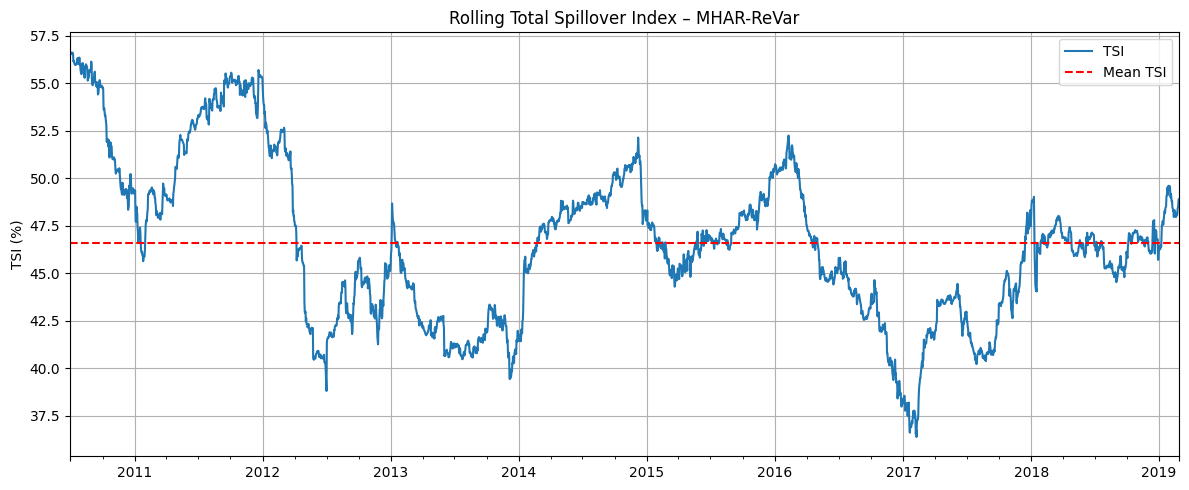

In [36]:
# -------- save & plot -------------------------------------------
tsi_df = pd.DataFrame({"TSI": tsi_vals}, index=dates)
tsi_df.to_parquet(
    f"parquet_files/rolling_tsi_mhar_revar_{selected_option}.parquet"
)

fig, ax = plt.subplots(figsize=(12, 5))
tsi_df["TSI"].plot(ax=ax, label="TSI")
ax.axhline(tsi_df["TSI"].mean(), ls="--", c="red", label="Mean TSI")
ax.set(title="Rolling Total Spillover Index ‚Äì MHAR-ReVar", ylabel="TSI (%)")
ax.legend(); ax.grid(True); plt.tight_layout(); plt.show()


C:\Users\frolo\AppData\Local\Temp\ipykernel_11316\3402994040.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect = [0, .05, 1, 1])


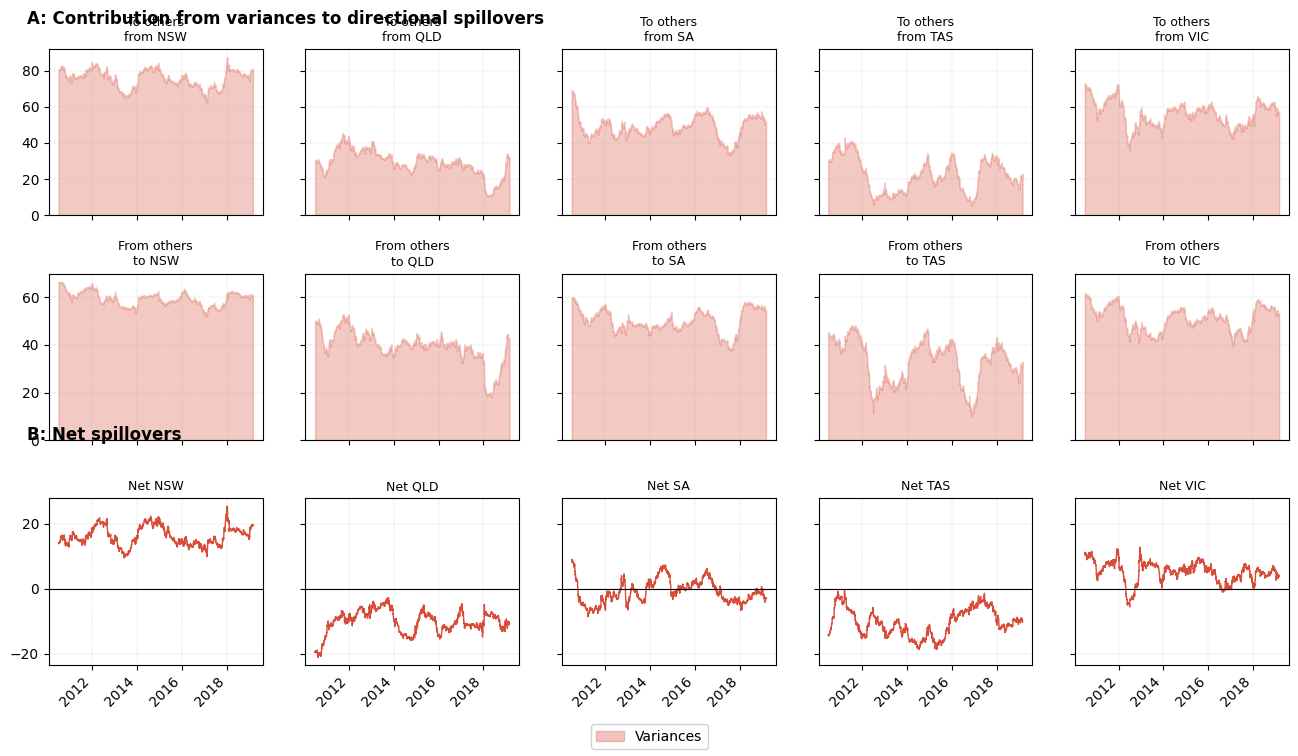

In [38]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
#  GRID TO-/FROM-/NET  ‚îÄ‚îÄ rolling MHAR-ReVar
#     ‚Ä¢ funciona con cualquier n¬∫ de mercados
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


# ------------------------------------------------------------------
# 1) datos
# ------------------------------------------------------------------
panel = pd.read_parquet(
    f"parquet_files/rolling_directional_revar_{option_selector.value}.parquet"
)                                # col-level-0: ["TO","FROM","NET"]

assert panel.shape[1] % 3 == 0, "panel does not have TO/FROM/NET blocks in columns"
assert panel.index.equals(to_df.index), "index mismatch after reload"


to_df, from_df, net_df = (panel[k] for k in ["TO", "FROM", "NET"])
markets                = to_df.columns.tolist()
n_mk                   = len(markets)
nicename = lambda s: s.upper()        # 'nsw' ‚Üí 'NSW'


# ------------------------------------------------------------------
# 2) par√°metros de dise√±o
# ------------------------------------------------------------------
col_chunk = 5                                # m√°x. columnas por ‚Äúbanda‚Äù
n_bands   = math.ceil(n_mk / col_chunk)      # bandas de 3 filas cada una

# figura
fig_w = 3.2 * min(col_chunk, n_mk)           # ancho aprox. 3.2‚ÄÜin por col.
fig_h = 8.0 * n_bands                        # 8‚ÄÜin por banda
fig , axes = plt.subplots(
    nrows = 3 * n_bands,
    ncols = col_chunk,
    figsize = (fig_w, fig_h),
    sharex = "row",
    sharey = "row",
    gridspec_kw = {"hspace": .35, "wspace": .20}
)

# Eje fecha
loc = mdates.YearLocator(base = 2)
fmt = mdates.DateFormatter("%Y")

# colores
col_var = "#d84d3a"
alpha   = .30

# ------------------------------------------------------------------
# 3) dibujar cada mercado en su grid-slot
# ------------------------------------------------------------------
for idx, mkt in enumerate(markets):
    name = nicename(mkt) 
    band   = idx // col_chunk          # banda 0,1,2‚Ä¶
    col    = idx %  col_chunk          # columna dentro de la banda
    rows   = np.arange(3) + band*3     # filas absolutas

    # TO ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    ax_to = axes[rows[0], col]
    ax_to.fill_between(to_df.index, 0, to_df[mkt],
                    color=col_var, alpha=alpha,
                    label="Variances" if idx==0 else None)
    ax_to.set_title(f"To others\nfrom {name}", fontsize=9)
    ax_to.set_ylim(0, to_df.max().max()*1.05)
    ax_to.xaxis.set_major_locator(loc); ax_to.xaxis.set_major_formatter(fmt)
    ax_to.tick_params(axis="x", labelbottom=False)          # quita fechas duplicadas
    ax_to.grid(ls=":", lw=.3)

    # FROM ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    ax_fr = axes[rows[1], col]
    ax_fr.fill_between(from_df.index, 0, from_df[mkt],
                    color=col_var, alpha=alpha)
    ax_fr.set_title(f"From others\nto {name}", fontsize=9)
    ax_fr.set_ylim(0, from_df.max().max()*1.05)
    ax_fr.xaxis.set_major_locator(loc); ax_fr.xaxis.set_major_formatter(fmt)
    ax_fr.tick_params(axis="x", labelbottom=False)
    ax_fr.grid(ls=":", lw=.3)

    # NET ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    ax_nt = axes[rows[2], col]
    ax_nt.plot(net_df.index, net_df[mkt], color=col_var, lw=1)
    ax_nt.axhline(0, color="black", lw=.8)
    ax_nt.set_title(f"Net {name}", fontsize=9)
    ax_nt.xaxis.set_major_locator(loc); ax_nt.xaxis.set_major_formatter(fmt)
    for lab in ax_nt.get_xticklabels():
        lab.set_rotation(45); lab.set_ha("right")
    ax_nt.grid(ls=":", lw=.3)

    # formato fechas solo en la fila NET
    ax_nt.xaxis.set_major_locator(loc)
    ax_nt.xaxis.set_major_formatter(fmt)
    for label in ax_nt.get_xticklabels():
        label.set_rotation(45); label.set_ha("right")

# ------------------------------------------------------------------
# 4) est√©tica global
# ------------------------------------------------------------------
# leyenda (solo una)
handles, labels = axes[0,0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, ncol = 1, loc = "lower center", frameon = False)


row_B = 2              # fila donde empiezan los paneles Net
# leyenda centrada
fig.legend(handles, labels, ncol=1, loc="lower center",
           framealpha=.9, facecolor="white")

# encabezados
axes[0, 0].text(-0.1, 1.15,
                "A: Contribution from variances to directional spillovers",
                transform=axes[0, 0].transAxes,
                fontsize=12, fontweight="bold")

axes[row_B, 0].text(-0.1, 1.35, "B: Net spillovers",
                    transform=axes[row_B, 0].transAxes,
                    fontsize=12, fontweight="bold")





plt.tight_layout(rect = [0, .05, 1, 1])
plt.show()

# ------------------------------------------------------------------
# 5) guarda el panel completo (TO / FROM / NET)
# ------------------------------------------------------------------
panel.to_parquet(
    f"parquet_files/directional_spillovers_revar_panel_{option_selector.value}.parquet"
)

